In [1]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [2]:
pointcloud = np.fromfile(str(r"C:\Users\lenovo\Desktop\kitti_lidar_to_bev\kitti_000008.bin"), dtype=np.float32, count=-1).reshape(-1,4)
print(pointcloud.shape)

(17238, 4)


In [3]:
pointcloud

array([[ 2.1554e+01,  2.8000e-02,  9.3800e-01,  3.4000e-01],
       [ 2.1240e+01,  9.4000e-02,  9.2700e-01,  2.4000e-01],
       [ 2.1056e+01,  1.5900e-01,  9.2100e-01,  5.3000e-01],
       ...,
       [ 6.3150e+00, -3.1000e-02, -1.6490e+00,  2.9000e-01],
       [ 6.3090e+00, -2.1000e-02, -1.6470e+00,  2.9000e-01],
       [ 6.3110e+00, -1.0000e-03, -1.6480e+00,  3.2000e-01]],
      dtype=float32)

In [4]:
len(pointcloud)

17238

In [6]:
x = pointcloud[:,0]
y = pointcloud[:,1]
z = pointcloud[:,2]

In [7]:
x,y,z

(array([21.554, 21.24 , 21.056, ...,  6.315,  6.309,  6.311], dtype=float32),
 array([ 0.028,  0.094,  0.159, ..., -0.031, -0.021, -0.001], dtype=float32),
 array([ 0.938,  0.927,  0.921, ..., -1.649, -1.647, -1.648], dtype=float32))

In [8]:
side_range = (-10, 10)
front_range = (0, 20)

In [9]:
side_range,front_range

((-10, 10), (0, 20))

In [11]:
front_filter = np.logical_and((x>front_range[0]),(x<front_range[1]))
side_filter = np.logical_and((y>side_range[0]),(y<side_range[1]))
dual_filter = np.logical_and(front_filter, side_filter)

In [12]:
front_filter,side_filter,dual_filter

(array([False, False, False, ...,  True,  True,  True]),
 array([ True,  True,  True, ...,  True,  True,  True]),
 array([False, False, False, ...,  True,  True,  True]))

In [13]:
indices = np.argwhere(dual_filter).flatten()

In [ ]:
indices

[False False False ...  True  True  True]
[   14    15    16 ... 17235 17236 17237]
(14580,)
[18.154 18.175 18.209 ...  6.315  6.309  6.311]
[-38 -41 -43 ...   1   1   0]
[-907 -908 -910 ... -315 -315 -315]
-1.804
0.893
[ 0.824  0.824  0.826 ... -1.649 -1.647 -1.648]
(14580,)
1001
1001


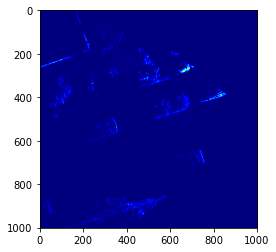

In [5]:
print(indices)

x_filtered = x[indices]
y_filtered = y[indices]
z_filtered = z[indices]
print(x_filtered.shape)
print(x_filtered)

# convert coordinate
res = 0.02
x_img = (-y_filtered / res).astype(np.int32)
y_img = (-x_filtered / res).astype(np.int32)
print(x_img)
print(y_img)

# shift origin to(0,0)
x_img_center = (x_img - side_range[0] / res).astype(np.int32)
y_img_center = (y_img + front_range[1] / res).astype(np.int32)

print(z_filtered.min())
print(z_filtered.max())
z_range = (-3, 1)
z_points = np.clip(z_filtered, a_min=z_range[0], a_max=z_range[1])
print(z_points)

def z_scale_to_255(z, min, max):
    z_normalized = ((z-min)*255/(max-min)).astype(dtype=np.uint8)
    return z_normalized

z_min = z_points.min()
z_max = z_points.max()
z_pixel = z_scale_to_255(z_points, z_min, z_max)
print(z_pixel.shape)

x_max = int((side_range[1]-side_range[0])/res)+1
y_max = int((front_range[1]-front_range[0])/res)+1
print(x_max)
print(y_max)
im = np.zeros([x_max, y_max], dtype=np.uint8)
im[x_img_center, y_img_center]= z_pixel

plt.imshow(im, cmap="jet", vmin=0, vmax=255)
plt.show()
